In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
#load data (don't forget to download first)
data = pd.read_csv('./data/Train_rev1.csv')
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


## plot salary
Normalized salary is the target variable. Seems fairly straight on a ylog plot suggesting a simple linear regression on categories isn't going to cut it.

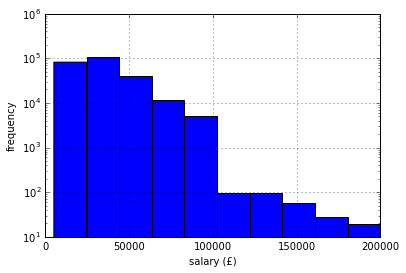

In [14]:
data.SalaryNormalized.hist(); plt.ylabel('frequency'); plt.xlabel(u'salary (£)'); plt.yscale('log');

In [55]:
results = set()

data['Title'].replace(r'[^0-9a-zA-Z]+',' ',regex=True).fillna('').str.lower().str.split().apply(results.update)
print(list(results)[1:100])



['webdeveloper', 'mecahic', 'smjs', 'tickdata', 'hopsital', 'holyrood', 'four', 'opengl', 'woods', 'nursingrgn', 'nhiberna', 'cyprus', 'verwood', 'whizzkidz', 'authorit', '2550mmch', 'analytic', 'staffmin', 'eligible', 'electricity', 'aggregations', 'profound', 'mecca', 'opener', 'inwards', 'farsley', 'dependency', 'appointers', 'delhi', 'weekslive', 'osat', 'deli', 'commercialisation', 'interpreters', 'regional', 'dell', 'bratislava', 'loughton', 'hdtv', 'executiveconsumer', 'unify', 'cjun', 'dementiaessex', 'designunigraphics', 'commision', 'internally', 'stadia', 'umts', 'timefashion', 'reliabilty', 'combermere', 'rabbitmq', 'piling', 'recruitmentnottingham', 'ehorb', 'auntomation', 'telesalestilehurst', 'wisbeach', 'succession', 'basick', 'mlh', 'libjingle', 'croatian', 'charter', 'javasript', 'nigh', 'tired', 'miller', 'bankers', 'watbio', 'shorthaul', 'pulse', 'feasibility', 'elegant', 'second', '275', 'sustaining', 'workless', 'esol', 'cheetham', 'sterile', 'managercyps', 'press

## plot job title as a word cloud

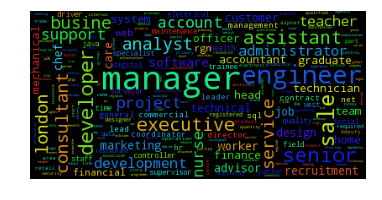

In [53]:
from wordcloud import WordCloud
text = ' '.join(data['Title'].replace(r'[^0-9a-zA-Z]+',' ',regex=True).fillna('').str.lower())
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()